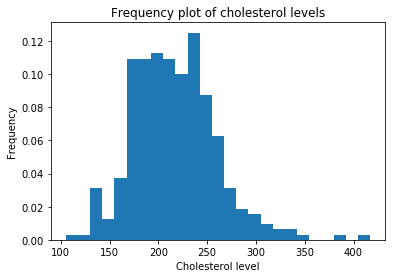

[ 105.    117.48  129.96  142.44  154.92  167.4   179.88  192.36  204.84
  217.32  229.8   242.28  254.76  267.24  279.72  292.2   304.68  317.16
  329.64  342.12  354.6   367.08  379.56  392.04  404.52  417.  ]


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import os

# Problem 7
# (a)
lipid = pd.read_csv('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/lipids.csv',skiprows=4)
lipid = lipid[lipid['diseased']!= 0]

bins = 25
weights = np.zeros(len(lipid['chol']))+(1 / len(lipid['chol']))
n, bin_cuts, patches = plt.hist(lipid['chol'], bins, weights=weights)
plt.xlabel('Cholesterol level')
plt.ylabel('Frequency')
plt.title('Frequency plot of cholesterol levels')
output_fldr = 'images'
output_dir = os.path.join(os.getcwd(), output_fldr)
output_path = os.path.join(output_dir, 'chol_freq')
plt.savefig(output_path)
plt.show()
print(bin_cuts)


As seen from the plot above, the midpoint of the bin with the highest frequency is (229.8+242.28)/2 = 236.04.

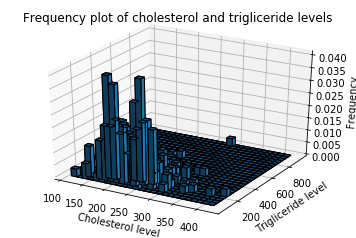

In [22]:
# (b)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = lipid['chol']
y = lipid['trig']

hist, xedges, yedges = np.histogram2d(x, y, bins=25)
freq = hist / 320
x_mid = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_mid = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
ypos, xpos  = np.meshgrid(y_mid, x_mid)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(625)
dx = (xedges[1] - xedges[0]) 
dy = (yedges[1] - yedges[0]) 
dz = freq.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', edgecolor='black')
ax.set_xlabel('Cholesterol level')
ax.set_ylabel('Trigliceride level')
ax.set_zlabel('Frequency')
plt.title('Frequency plot of cholesterol and trigliceride levels')
output_path = os.path.join(output_dir, 'chol_tri_freq')
plt.savefig(output_path)
plt.show()


(c)
The new feature that emerges in the 3D plot is that most people included have high trigliceride levels (>200). As seen from part (a), many observations have moderate to low cholesterol levels, so their high trigliceride level could potentially be a reason for their death.